In [1]:
# Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('D:/Data for Project/heart+failure+clinical+records')

In [4]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.shape

(299, 13)

In [7]:
n=df.isna().sum()
n[n>0]

Series([], dtype: int64)

In [ ]:
# Scaling the features

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss=StandardScaler()

In [10]:
x=pd.DataFrame(ss.fit_transform(df),columns=ss.get_feature_names_out())

In [11]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1.454161
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1.454161
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1.454161
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1.454161
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1.454161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451,-0.687682
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357,-0.687682
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697,-0.687682
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509,-0.687682


In [ ]:
# Model-Building

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
agg=AgglomerativeClustering(n_clusters=4)

In [14]:
agg.fit(x)

AgglomerativeClustering(n_clusters=4)

In [15]:
labels=agg.labels_

In [16]:
labels

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 0, 1, 2, 2, 0,
       0, 1, 0, 2, 1, 1, 3, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 3, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2,
       0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1], dtyp

In [ ]:
# plotting dendrogram

In [17]:
from scipy.spatial import distance_matrix

In [18]:
dm=distance_matrix(x,x)

In [19]:
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
from scipy.cluster.hierarchy import linkage

In [21]:
link=linkage(dm,method='complete')

In [22]:
from scipy.cluster.hierarchy import dendrogram

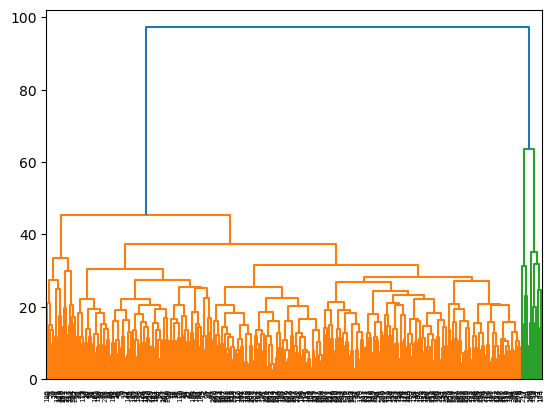

In [23]:
d=dendrogram(link)